# <center> Линейная алгебра в контексте линейных методов. Практика.

## <center> Прогнозирование выработки газа на скважинах.

## Постановка задачи

У Василия, основателя компании «Газ-Таз-Ваз-Нефть», дела идут в гору: у него уже функционирует 200 скважин для добычи газа. В этом году он открывает 30 новых скважин. Однако в целях оптимизации расходов и повышения дохода Василию необходимо оценить, сколько денег будет приносить ему каждая из скважин, а также понять, какие факторы (параметры скважин) потенциально сильнее всего повлияют на объём добычи газа. Для этого Василий решил нанять вас как специалиста в области Data Science.

Василий представляет вам набор данных о добыче газа на своих скважинах. Файл с данными вы можете скачать на платформе.

**Признаки в данных:**

* Well — идентификатор скважины;
* Por — пористость скважины (%);
* Perm — проницаемость скважины;
* AI — акустический импеданс ($кг/м^2 * 10^6$);
* Brittle — коэффициент хрупкости скважины (%);
* TOC — общий органический углерод (%);
* VR — коэффициент отражения витринита (%);
* Prod — добыча газа в сутки (млн. кубических футов).

**Ваша задача** — построить регрессионную модель, которая прогнозирует выработку газа на скважине (целевой признак — Prod) на основе остальных характеристик скважины, и проинтерпретировать результаты вашей модели.

Разделим задачу на две части:
* В первой мы построим простейшую модель линейной регрессии, проанализируем результаты её работы и выберем наиболее значимые факторы для прогнозирования.
* Во второй мы займёмся построением модели полиномиальной регрессии с регуляризацией и посмотрим на итоговые результаты моделирования.


Импортируем необходимые библиотеки:

In [133]:
# Импорт библиотек
import numpy as np # для работы с массивами
import pandas as pd # для работы с DataFrame 
import seaborn as sns # библиотека для визуализации статистических данных
import matplotlib.pyplot as plt # для построения графиков
from sklearn import metrics
from sklearn import linear_model

%matplotlib inline

Прочитаем исходные данные:

In [134]:
data = pd.read_csv('data/unconv.csv')
data.head()

,Well,Por,Perm,AI,Brittle,TOC,VR,Prod
0,1,12.08,2.92,2.80,81.40,1.16,2.31,4165.196191
1,2,12.38,3.53,3.22,46.17,0.89,1.88,3561.146205
2,3,14.02,2.59,4.01,72.80,0.89,2.72,4284.348574
3,4,17.67,6.75,2.63,39.81,1.08,1.88,5098.680869
4,5,17.52,4.57,3.18,10.94,1.51,1.90,3406.132832


## Практика: линейная регрессия по методу наименьших квадратов

Для начала построим простейшую модель линейной регрессии, проанализируем результаты её работы и выберем наиболее значимые факторы для прогнозирования.

В первой части вам предстоит выполнить задания 5.0–5.6. Максимальное количество баллов, которое можно получить, — 9.

### Задание 5.0. (не оценивается)

Проведите небольшой разведывательный анализ, чтобы поближе познакомиться с исходными данными. Постройте несколько визуализаций, которые помогут вам понять, как устроены исходные признаки, а также смогут продемонстрировать взаимосвязь факторов. 

Сделайте промежуточные выводы из проведённого разведывательного анализа.

In [135]:
data.describe()

,Well,Por,Perm,AI,Brittle,TOC,VR,Prod
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,14.991150,4.330750,2.968850,48.161950,0.990450,1.964300,4311.219852
std,57.879185,2.971176,1.731014,0.566885,14.129455,0.481588,0.300827,992.038414
min,1.000000,6.550000,1.130000,1.280000,10.940000,-0.190000,0.930000,2107.139414
25%,50.750000,12.912500,3.122500,2.547500,37.755000,0.617500,1.770000,3618.064513
50%,100.500000,15.070000,4.035000,2.955000,49.510000,1.030000,1.960000,4284.687348
75%,150.250000,17.402500,5.287500,3.345000,58.262500,1.350000,2.142500,5086.089761
max,200.000000,23.550000,9.870000,4.630000,84.330000,2.180000,2.870000,6662.622385


array([[<Axes: title={'center': 'Well'}>,
        <Axes: title={'center': 'Por'}>,
        <Axes: title={'center': 'Perm'}>],
       [<Axes: title={'center': 'AI'}>,
        <Axes: title={'center': 'Brittle'}>,
        <Axes: title={'center': 'TOC'}>],
       [<Axes: title={'center': 'VR'}>, <Axes: title={'center': 'Prod'}>,
        <Axes: >]], dtype=object)

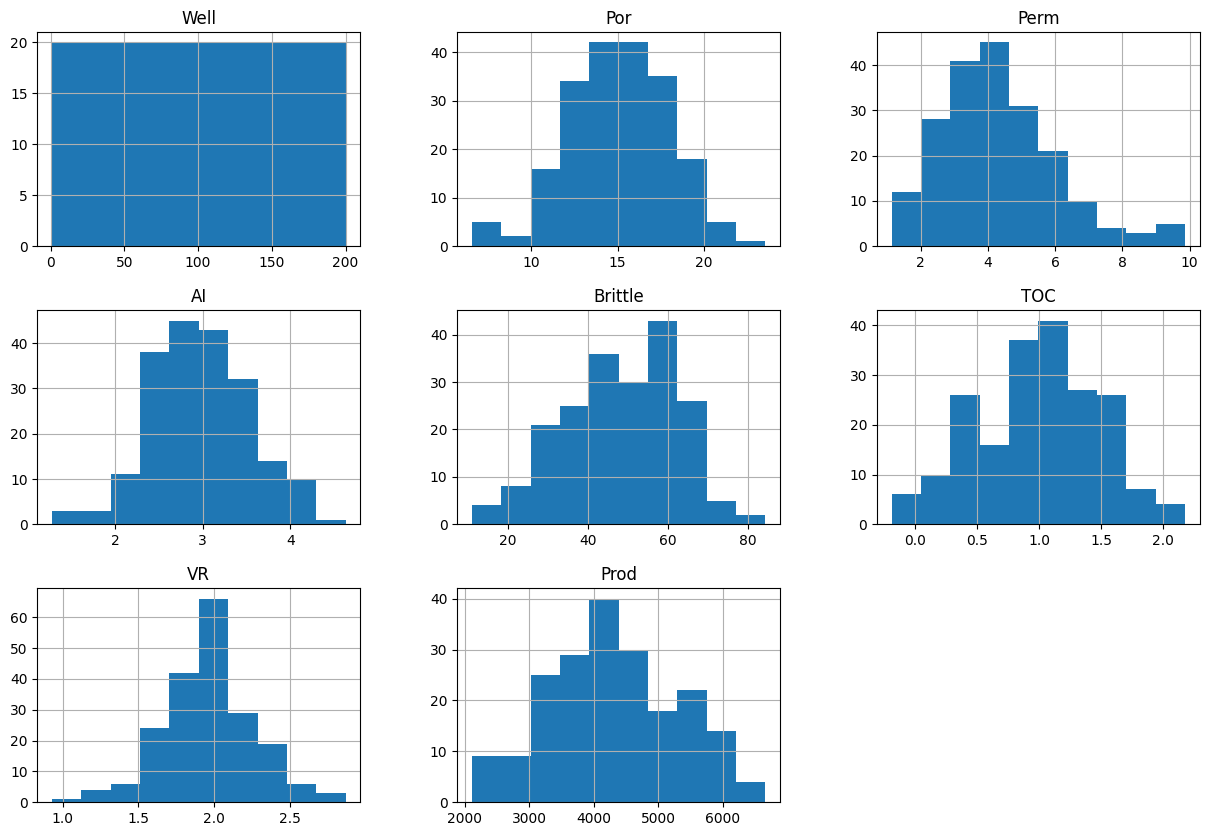

In [136]:
data.hist(figsize=(15,10))

### Задание 5.1. (2 балла)

Постройте корреляционную матрицу факторов, включив в неё целевой признак. 

Для наглядности визуализируйте полученную матрицу с помощью тепловой карты. 

**Примечание.** *Для визуализации вы можете использовать любую из знакомых вам библиотек.*

На основе построенной корреляционной матрицы ответьте на следующий вопрос:

* Какие факторы сильнее всего коррелируют с целевой переменной?

Вычислите ранг и определитель полученной матрицы корреляций и приведите развёрнутые ответы на следующие вопросы:
* Является ли корреляционная матрица плохо обусловенной (близок ли её опредитель к нулю)?
* Что вы можете сказать о наличии коллинераности/мультиколлинеарности в данных? 
* Применима ли в данном случае модель классической линейной регрессии по методу наименьших квадратов и почему? 

**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**2 балла**): 
    * приведён код для расчёта корреляционной матрицы;
    * приведён код для визуализации корреляционной матрицы в виде тепловой карты;
    * рассчитаны ранг и определитель корреляционной матрицы;
    * предоставлены обоснованные ответы на все поставленные вопросы. 

- Задание выполнено верно, но не учтено одно условие (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

Text(0.5, 1.0, 'Тепловая карта корреляции')

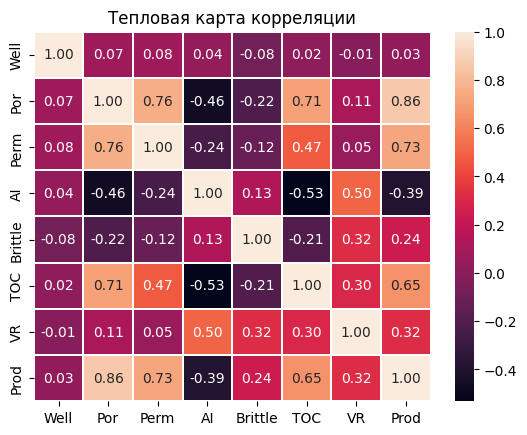

In [137]:
data_corr = data.corr() #матрица корреляции
ax = sns.heatmap(data_corr, fmt='.2f', linewidths=.1, annot=True)
ax.set_title('Тепловая карта корреляции')

Сильнее всего с целевой переменной коррелируют факторы "пористость скважины"(Por) и "проницаемость скважины"(Perm). Немного слабее корреляция целевой переменной с фактором "общий органический углерод"(TOC).

In [138]:
print('Ранг матрицы коллинеарности:', np.linalg.matrix_rank(data_corr),
      '\nОпределитель матрицы:', np.linalg.det(data_corr).round(5))

Ранг матрицы коллинеарности: 8 
Определитель матрицы: 0.00073


Определитель матрицы близок к нулю, поэтому матрица близка к вырожденной и плохо обусловлена. Чистой коллинеарности не наблюдается, зато присутствует мультиколлинеарность - сильная связь с двумя факторами. Без удаления признаков модель классической линейной регрессии в данном случае не применима - в связи с близостью матрицы корреляции к вырождению. Наши данные плохо обусловлены.

### Задание 5.2. (2 балла)

Создайте матрицу наблюдений `X` и вектор правильных ответов `y`. В качестве факторов для матрицы наблюдений возьмите все имеющиеся в данных признаки. 

Постройте модель линейной регрессии по методу наименьших квадратов. Для этого воспользуйтесь матричной формулой МНК и инструментарием библиотеки numpy. 

Выведите на экран полученные оценки коэффициентов модели, округлённые до целого.

Приведите подробные выводы по полученным результатам, ответив на следующие вопросы:
* Есть ли в ваших данных признаки, которые, согласно модели, можно назвать неинформативными, то есть они не оказывают влияния на целевую переменную или оказывают шумовое влияние?
* Приведите интерпретацию нескольких (двух или трёх) коэффициентов полученной модели линейной регрессии.


**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**2 балла**): 
    * приведён код для нахождения параметров модели линейной регрессии с помощью матричной формулы МНК;
    * на основе полученных параметров даны верные ответы на поставленные вопросы;
    * приведена корректная интерпретация нескольких коэффициентов полученной модели линейной регрессии.

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

In [139]:
X = np.column_stack((np.ones(200), data.drop(['Prod'], axis=1)))
y = data[['Prod']]
w_hat=np.linalg.inv(X.T@X)@X.T@y
print(w_hat.round())

     Prod
0 -1232.0
1     0.0
2   230.0
3   116.0
4  -365.0
5    25.0
6   -78.0
7   785.0


Первый признак "Well" совсем неинформативен, его округленный до целого коэффициент равен 0, значит при его изменении изменения целевого признака будут минимальны. А если посмотреть на матрицу корреляции, то данный признак имеет минимальную корреляцию с целевым признаком, а значит и оказывает на него минимальное влияние.

При увеличении пористости скважины(2) на 1% добыча газа возрастает на 230 млн. кубических футов в сутки.

При увеличении аккустического импеданса(4) на одну единицу добыча газа уменьшается на 365 млн. кубических футов в сутки.

Признак коэффициент отражения витринита(7) - при его увеличении на 1% добыча газа возрастает на 785 млн. кубических футов в сутки.

### Задание 5.3. (1 балл)

Теперь потренируемся строить предсказание для наблюдений целевой переменной. 

**а)** Постройте прогноз выработки газа для скважины со следующими параметрами:

```python
{
    'Well': 106.0,
    'Por': 15.32,
    'Perm': 3.71,
    'AI': 3.29,
    'Brittle': 55.99,
    'TOC': 1.35,
    'VR': 2.42
 }
```

Рассчитайте абсолютную ошибку построенного вами прогноза для предложенной скважины (в миллионах кубических футов в день), если известно, что на этой скважине производится `4748.315024` миллионов кубических футов газа в день. 

**б)** Постройте прогноз выработки газа для всех скважин из обучающего набора данных. Выберите метрику, по которой вы будете оценивать качество регрессионных моделей и сравнивать их между собой (можно использовать несколько метрик, но не более двух).

Рассчитайте значение выбранной метрики для вашей модели. Приведите интерпретацию полученного результата. 

**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**1 балл**): 
    * приведён код для построения прогноза выработки газа на указанной скважине и рассчитана абсолютная ошибка прогноза для этой скважины;
    * выбрана корректная для поставленной задачи метрика (или метрики) оценки качества модели и приведён код для расчёта этой метрики на всём обучающем наборе данных;
    * приведена корректная интерпретация полученного результата.

- Задание выполнено верно, но не учтено одно из условий, или задание выполнено неверно (**0 баллов**).

In [140]:
new = np.array([[1, 106.0, 15.32, 3.71, 3.29, 55.99, 1.35, 2.42]])
new_pred = (new@w_hat).values
pred = 4748.315024
print('Prediction new:', new_pred)
print('MAE score new:', pred - new_pred)

Prediction new: [[4723.06405371]]
MAE score new: [[25.25097029]]


In [141]:
y_pred = (X@w_hat).values
#MSE_pred = (abs((y_pred - y))**2).sum()/len(y)
#y_mean = y_pred.mean()
#MSE_mean = (((abs(y - y_mean))**2).sum())/len(y)
print('MAE score:', (abs((y - y_pred)).sum()/len(y)).values.round(2))
print('MAPE score:', (((abs((y - y_pred))/y).sum()/len(y))*100).values.round(2))
#print('R2 score:', (1 - (MSE_pred/MSE_mean)).values)

MAE score: [153.62]
MAPE score: [3.63]


Не знала можно ли пользоваться библиотекой метрик, решила раз у нас модуль по математике, то рассчет метрик должен производиться ручками без использования библиотеки с метриками.

Из метрики MAE видно что в среднем предсказанная выработка газа разошлась с реальной на 153,6 млн. кубических футов. А из метрики MAPE видно что построеная модель в среднем отклоняется на 3,63% от реального значения, что является весьма неплохим результатом.

### Задание 5.4. (1 балл)

Настало время анализа построенной модели. Посмотрите на коэффициенты и сравните их знаки со значениями выборочных корреляций между целевым признаком и факторами, которые вы нашли ранее.

Дайте развёрнутые ответы на следующие вопросы:

* Есть ли в вашей модели фактор, при котором коэффициент в модели линейной регрессии противоречит соответствующему коэффициенту корреляции? Например, корреляция говорит, что зависимость между фактором и целевой переменной прямая, а модель говорит обратное. Если таких факторов несколько, укажите их все.
* Как вы считаете, с чем связано полученное противоречие результатов?

**Критерии оценивания:**

- Задание выполнено верно, даны корректные развёрнутые ответы на все поставленные в задании вопросы (**1 балл**). 

- Задание выполнено неверно, даны некорректные ответы на один или несколько поставленных в задании вопросов (**0 баллов**).

,Prod
0,-1232.308030
1,0.050700
2,230.179140
3,116.239006
4,-365.202301
5,24.994370
6,-78.400929
7,785.259815


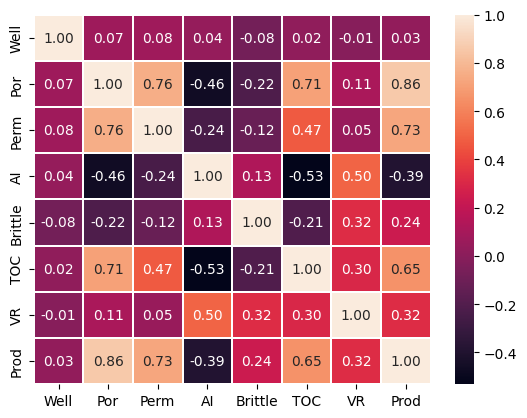

In [142]:
ax = sns.heatmap(data_corr, fmt='.2f', linewidths=.1, annot=True)
w_hat

In [143]:
x_toc = np.column_stack((np.ones(200), data['TOC']))
np.linalg.inv(x_toc.T@x_toc)@x_toc.T@y

,Prod
0,2975.981677
1,1348.112651


Таким фактором является "TOC"(общий органический углерод). Пыталась разобраться откуда появляется отрицательный коэффициент, но на модели построенной с использованием только одного фактора коэффициент получается положительный. Могу только предположить что это произошло из-за отрицательного нулевого коэффициента.

### Задание 5.5. (2 балла)

* Исключите из данных сильно коррелированные между собой факторы. Под сильной корреляцией в данной задаче будем понимать значения выше `0.7`.

Выбирая, какой из коррелированных факторов оставить, руководствуйтесь коэффициентом корреляции с целевой переменной: оставляйте тот фактор, который больше всего коррелирует с целевой переменной (объёмом добычи газа).

* Также исключите из данных факторы, для которых корреляция с целевой переменной меньше `0.05`.

Постройте модель линейной регрессии на обновлённых после удаления факторов данных по методу наименьших квадратов. Для этого используйте матричную формулу и библиотеку numpy. Выведите значение полученных коэффициентов, округлённых до целого.

Сделайте прогноз для всего обучающего набора данных и рассчитайте выбранную вами ранее метрику (или метрики). 

Дайте подробные ответы на следующие вопросы:

* Приведите интерпретацию нескольких полученных коэффициентов (двух или трёх). Сравните их значения с полученными ранее.
* Приведите интерпретацию полученных значений метрик. Сравните их значения с полученными ранее. 
* Удалось ли вам побороть противоречие коэффициентов линейной регрессии и коэффициентов корреляции?

**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**2 балла**): 
    * отобраны верные факторы;
    * на основе отобранных факторов построена модель линейной регрессии с помощью матричной формулы МНК и найдены параметры модели, соответствующие каждому из факторов;
    * построен прогноз для всего обучающего набора данных и рассчитано значение метрики (метрика должна быть выбрана корректно);
    * даны ответы на все поставленные в задании вопросы.

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено верно, не учтено несколько из условий (**0 баллов**).

In [144]:
#считаем модель без скорррелированных данных
X_del = np.column_stack((np.ones(200), data.drop(['Prod', 'Perm', 'TOC', 'Well'], axis=1)))
y = data[['Prod']]
w_hat_del=np.linalg.inv(X_del.T@X_del)@X_del.T@y
print(w_hat_del.round())

     Prod
0 -1835.0
1   293.0
2  -200.0
3    28.0
4   517.0


*"При увеличении пористости скважины(2) на 1% добыча газа возрастает на 230 млн. кубических футов в сутки.*

*При увеличении аккустического импеданса(4) на одну единицу добыча газа уменьшается на 365 млн. кубических футов в сутки.*

*Признак коэффициент отражения витринита(7) - при его увеличении на 1% добыча газа возрастает на 785 млн. кубических футов в сутки."*

При увеличении пористости скважины(2) на 1% добыча газа возрастает на 293 млн. кубических футов в сутки.

При увеличении аккустического импеданса(3) на одну единицу добыча газа уменьшается на 200 млн. кубических футов в сутки.

Признак коэффициент отражения витринита(5) - при его увеличении на 1% добыча газа возрастает на 517 млн. кубических футов в сутки.

У менее коррелированных с целевой переменной факторов значения изменились в меньшую сторону, а у "Por" сильноскоррелированного значение увеличилось.

In [145]:
#рассчитываем метрики
y_pred_del = (X_del@w_hat_del).values
print('MAE score:', (abs((y - y_pred_del)).sum()/len(y)).values.round(2))
print('MAPE score:', (((abs((y - y_pred_del))/y).sum()/len(y))*100).values.round(2))

MAE score: [171.43]
MAPE score: [4.04]


Значения метрик изменились в худшую сторону, если раньше модель ошибалась в среднем на 153,62 млн. кубических футов, то теперь на 171,43. Также ухудшилось значение метрики MAPE - вместо 3,63% мы получили 4,04%.

Ответ на последний вопрос весьма интересен, особенно учитывая что по всем параметрам фактор "TOC" должен быть удален из-за корреляции(0.71) с фактором "Por", а "Por" в свою очередь более скоррелирован с целевым фактором(Por - 0.86, TOC - 0.65).

In [146]:
#считаем модель и предсказания с "TOC"
X_toc = np.column_stack((np.ones(200), data.drop(['Prod', 'Perm', 'Well'], axis=1)))
y = data[['Prod']]
w_hat_toc=np.linalg.inv(X_toc.T@X_toc)@X_toc.T@y
print(w_hat_toc.round())

y_pred_toc = (X_toc@w_hat_toc).values
print('MAE score:', (abs((y - y_pred_toc)).sum()/len(y)).values.round(2))
print('MAPE score:', (((abs((y - y_pred_toc))/y).sum()/len(y))*100).values.round(2))

     Prod
0 -1889.0
1   290.0
2  -140.0
3    29.0
4    89.0
5   407.0
MAE score: [170.37]
MAPE score: [4.02]


Значения метрик даже немного улучшились. А противоречие исчезло - коэффициент положительный.

### Задание 5.6. (1 балл)

Наконец, давайте построим модель линейной регрессии из библиотеки `scikit-learn (sklearn)` и сравним результаты её работы с теми, что нам удалось получить вручную. 

Постройте модель линейной регрессии на обновлённых после удаления факторов данных по методу наименьших квадратов. Для этого воспользуйтесь классом `LinearRegression` из библиотеки `sklearn`. Выведите значения полученных коэффициентов, округлённые до целого.

Сделайте прогноз для всего обучающего набора данных и рассчитайте значение выбранной вами метрики (или метрик).

Сравните результаты библиотечной реализации с тем, что вы получили ранее. 

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**1 балл**): 
    * на основе отобранных факторов построена модель линейной регрессии из библиотеки sklearn и найдены параметры модели, соответствующие каждому из факторов;
    * построен прогноз для всего обучающего набора данных и рассчитано значение метрики (метрика должна быть выбрана корректно);
    * приведён вывод о соответствии результатов, полученных вручную и с помощью библиотеки.
- Задание выполнено неверно, не учтено одно или несколько условий (**0 баллов**).

In [148]:
lr = linear_model.LinearRegression()
lr.fit(X_del, y)
print(lr.coef_.round())
mae_lr = metrics.mean_absolute_error(y, lr.predict(X_del))
mape_lr = metrics.mean_absolute_percentage_error(y, lr.predict(X_del))*100
print('MAE score:', mae_lr.round(2))
print('MAPE score:', mape_lr.round(2))

[[   0.  293. -200.   28.  517.]]
MAE score: 171.43
MAPE score: 4.04


Результаты полностью совпадают с рассчитанными ранее.

## Практика: полиномиальная регрессия и регуляризация

Мы продолжаем работать над задачей от владельца компании «Газ-Таз-Ваз-Нефть» Василия.

Ранее мы построили модель линейной регрессии, которая прогнозирует выработку газа на скважине. Для этого мы с помощью матрицы корреляций и рассуждений отобрали некоррелированные, значимые для предсказания признаки. **Далее мы будем использовать именно их (см. задание 5.5).**

Мы хотим улучшить результат — уменьшить ошибку прогноза. Для этого мы воспользуемся моделью полиномиальной регрессии третьей степени. Однако теперь мы знаем, что полиномиальным моделям очень легко переобучиться под исходную выборку. Так как данных у нас не так много (всего 200 скважин), то для контроля качества модели мы будем использовать кросс-валидацию. 

Приступим! Выполните задания 8.1–8.5:


In [149]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate
import optuna

### Задание 8.1. (1 балл)

Стандаризируйте признаки с помощью `StandartScaler` из библиотеки `sklearn`. 

Затем сгенерируйте полиномиальные признаки третьего порядка на факторах, которые вы выбрали для обучения моделей. Для этого воспользуйтесь генератором полиномов `PolynomialFeatures` из библиотеки `sklearn`. Параметр `include_bias` установите в значение `False`.

Выведите на экран, сколько факторов у вас получилось после генерации полиномиальных признаков.

**Важно:** стандартизацию необходимо произвести до генерации полиномиальных факторов!

Обучите модель линейной регрессии из библиотеки `sklearn` (`LinearRegression`) на полученных полиномиальных факторах.

Используя кросс-валидацию оцените среднее значение выбранной вами метрики (или метрик) на тренировочных и валидационных фолдах.

Проинтерпретируйте полученные результаты.

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**1 балл**): 
    * на основе отобранных факторов сгенерированы полиномиальные признаки третьего порядка;
    * построена модель полиномиальной регрессии (линейной регрессии на полиномиальных признаках);
    * с помощью кросс-валидации оценено среднее значение выбранной студентом метрики (или метрик) на тренировочных и валидационных фолдах (метрика должна быть выбрана корректно).
- Задание выполнено неверно, не учтено одно или несколько из условий (**0 баллов**).

In [115]:
X_del = data.drop(['Prod', 'Perm', 'TOC', 'Well'], axis=1)

scaler = StandardScaler()
X_sc = scaler.fit_transform(X_del)

poly = PolynomialFeatures(degree=3, include_bias=False)
X_sc = poly.fit_transform(X_sc)
print('Количество полиноминальных факторов:', X_sc.shape[1])

lr_poly = LinearRegression()
results_mae = cross_validate(lr_poly, X_sc, y, scoring='neg_mean_absolute_error', cv=5, return_train_score=True)
results_mape = cross_validate(lr_poly, X_sc, y, scoring='neg_mean_absolute_percentage_error', cv=5, return_train_score=True)

print('MAE на тренировочных фолдах: {:.2f} млн. кубических футов'.format(-results_mae['train_score'].mean()))
print('MAE на валидационных фолдах: {:.2f} млн. кубических футов'.format(-results_mae['test_score'].mean()))
print('MAPE на тренировочных фолдах: {:.2f} %'.format(-results_mape['train_score'].mean() *100))
print('MAPE на валидационных фолдах: {:.2f} %'.format(-results_mape['test_score'].mean() *100))

Количество полиноминальных факторов: 34
MAE на тренировочных фолдах: 75.35 млн. кубических футов
MAE на валидационных фолдах: 110.47 млн. кубических футов
MAPE на тренировочных фолдах: 1.77 %
MAPE на валидационных фолдах: 2.68 %


Прекрасные результаты, лучше чем было до генерации полиноминальных признаков. Расхождения между тренировочными и валидационными фолдами небольшое, значит переобучения нет.

### Задание 8.2. (2 балла)

Теперь попробуем воспользоваться линейной регрессией с регуляризацией. Для начала возьмём $L_1$-регуляризацию.

Обучите модель `Lasso` из библиотеки `sklearn` на полученных полиномиальных факторах, предварительно стандартизировав факторы. 

Коэффициент регуляризации (`alpha`) подберите самостоятельно с помощью любого известного вам метода подбора гиперпаметров.

Используя кросс-валидацию, оцените среднее значение выбранной вами метрики (или метрик) на тренировочных и валидационных фолдах.

Проинтерпретируйте полученные результаты.

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**2 балла**): 
    * правильно построена модель полиномиальной регрессии (линейной регрессии на полиномиальных признаках) с регуляризацией (Lasso), учтены условия необходимости масштабирования факторов для построения модели;
    * приведён код для подбора параметра регуляризации (вручную или с помощью библиотечных инструментов);
    * с помощью кросс-валидации оценено среднее значение выбранной студентом метрики (или метрик) на тренировочных и валидационных фолдах (метрика должна быть выбрана корректно).

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

In [105]:
def optuna_lasso(trial, cv=5, X=X_sc, y=y):
  # задаем пространства поиска гиперпараметров
  alpha_l1= trial.suggest_float('alpha', 0, 30, step=0.01)

  # создаем модель
  lasso = Lasso(alpha=alpha_l1, max_iter=10000)
  
  score = cross_validate(lasso, X, y, cv=cv, scoring="neg_mean_absolute_error", n_jobs=-1)
  score = -score['test_score'].mean()

  return score

# cоздаем объект исследования
study_lasso = optuna.create_study(study_name="Lasso_one", direction="minimize")
# ищем лучшую комбинацию гиперпараметров n_trials раз
study_lasso.optimize(optuna_lasso, n_trials=50)

[I 2024-06-14 20:08:13,491] A new study created in memory with name: Lasso_one
[I 2024-06-14 20:08:17,482] Trial 0 finished with value: 106.61620801155682 and parameters: {'alpha': 18.66}. Best is trial 0 with value: 106.61620801155682.
[I 2024-06-14 20:08:20,027] Trial 1 finished with value: 104.5366340665818 and parameters: {'alpha': 15.68}. Best is trial 1 with value: 104.5366340665818.
[I 2024-06-14 20:08:20,056] Trial 2 finished with value: 117.99674445751873 and parameters: {'alpha': 26.22}. Best is trial 1 with value: 104.5366340665818.
[I 2024-06-14 20:08:20,083] Trial 3 finished with value: 107.88607191210447 and parameters: {'alpha': 19.95}. Best is trial 1 with value: 104.5366340665818.
[I 2024-06-14 20:08:20,110] Trial 4 finished with value: 98.79293941052777 and parameters: {'alpha': 9.06}. Best is trial 4 with value: 98.79293941052777.
[I 2024-06-14 20:08:20,137] Trial 5 finished with value: 100.31369772017074 and parameters: {'alpha': 1.78}. Best is trial 4 with value: 9

In [106]:
lasso = Lasso(**study_lasso.best_params, max_iter=10000)

mae_lasso = cross_validate(lasso, X_sc, y, scoring='neg_mean_absolute_error', cv=5, return_train_score=True)
mape_lasso = cross_validate(lasso, X_sc, y, scoring='neg_mean_absolute_percentage_error', cv=5, return_train_score=True)

print('MAE на тренировочных фолдах: {:.2f} млн. кубических футов'.format(-mae_lasso['train_score'].mean()))
print('MAE на валидационных фолдах: {:.2f} млн. кубических футов'.format(-mae_lasso['test_score'].mean()))
print('MAPE на тренировочных фолдах: {:.2f} %'.format(-mape_lasso['train_score'].mean() *100))
print('MAPE на валидационных фолдах: {:.2f} %'.format(-mape_lasso['test_score'].mean() *100))

MAE на тренировочных фолдах: 78.04 млн. кубических футов
MAE на валидационных фолдах: 95.66 млн. кубических футов
MAPE на тренировочных фолдах: 1.82 %
MAPE на валидационных фолдах: 2.28 %


Результаты метрик стали лучше чем без регуляризации. Переобучения не наблюдается.

### Задание 8.3. (2 балла)

Проделаем то же самое с $L_2$-регуляризацией.

Обучите модель `Ridge` из библиотеки `sklearn` на полученных полиномиальных факторах, предварительно стандартизировав факторы. 

Коэффициент регуляризации (`alpha`) подберите самостоятельно с помощью любого известного вам метода подбора гиперпаметров.

Используя кросс-валидацию оцените среднее значение выбранной вами метрики (или метрик) на тренировочных и валидационных фолдах.

Проинтерпретируйте полученные результаты.

In [107]:
def optuna_ridge(trial, cv=5, X=X_sc, y=y):
  # задаем пространства поиска гиперпараметров
  alpha_l2= trial.suggest_float('alpha', 0, 30, step=0.01)

  # создаем модель
  ridge = Ridge(alpha=alpha_l2, max_iter=10000)
  
  score = cross_validate(ridge, X, y, cv=cv, scoring="neg_mean_absolute_error", n_jobs=-1)
  score = -score['test_score'].mean()

  return score

# cоздаем объект исследования
study_ridge = optuna.create_study(study_name="Ridge_one", direction="minimize")
# ищем лучшую комбинацию гиперпараметров n_trials раз
study_ridge.optimize(optuna_ridge, n_trials=50)

ridge = Ridge(**study_ridge.best_params, max_iter=10000)

mae_ridge = cross_validate(ridge, X_sc, y, scoring='neg_mean_absolute_error', cv=5, return_train_score=True)
mape_ridge = cross_validate(ridge, X_sc, y, scoring='neg_mean_absolute_percentage_error', cv=5, return_train_score=True)

print('MAE на тренировочных фолдах: {:.2f} млн. кубических футов'.format(-mae_ridge['train_score'].mean()))
print('MAE на валидационных фолдах: {:.2f} млн. кубических футов'.format(-mae_ridge['test_score'].mean()))
print('MAPE на тренировочных фолдах: {:.2f} %'.format(-mape_ridge['train_score'].mean() *100))
print('MAPE на валидационных фолдах: {:.2f} %'.format(-mape_ridge['test_score'].mean() *100))

[I 2024-06-14 20:09:25,869] A new study created in memory with name: Ridge_one
[I 2024-06-14 20:09:25,905] Trial 0 finished with value: 175.74087431700582 and parameters: {'alpha': 17.02}. Best is trial 0 with value: 175.74087431700582.
[I 2024-06-14 20:09:25,934] Trial 1 finished with value: 178.86083542554147 and parameters: {'alpha': 17.990000000000002}. Best is trial 0 with value: 175.74087431700582.
[I 2024-06-14 20:09:25,962] Trial 2 finished with value: 207.30696777830508 and parameters: {'alpha': 28.21}. Best is trial 0 with value: 175.74087431700582.
[I 2024-06-14 20:09:25,997] Trial 3 finished with value: 113.23089636902012 and parameters: {'alpha': 1.52}. Best is trial 3 with value: 113.23089636902012.
[I 2024-06-14 20:09:26,040] Trial 4 finished with value: 200.1656272854661 and parameters: {'alpha': 25.41}. Best is trial 3 with value: 113.23089636902012.
[I 2024-06-14 20:09:26,070] Trial 5 finished with value: 192.3699601789636 and parameters: {'alpha': 22.52}. Best is tri

MAE на тренировочных фолдах: 75.37 млн. кубических футов
MAE на валидационных фолдах: 110.07 млн. кубических футов
MAPE на тренировочных фолдах: 1.77 %
MAPE на валидационных фолдах: 2.67 %


Переобучения нет, но результаты метрик хуже чем с L1 регуляризацией, они почти такие же как без регуляризации.

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**2 балла**): 
    * правильно построена модель полиномиальной регрессии (линейной регрессии на полиномиальных признаках) с регуляризацией (Ridge), учтены условия необходимости масштабирования факторов для построения модели;
    * приведён код для подбора параметра регуляризации (вручную или с помощью библиотечных инструментов);
    * с помощью кросс-валидации оценено среднее значение выбранной студентом метрики (или метрик) на тренировочных и валидационных фолдах (метрика должна быть выбрана корректно).

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

### Задание 8.4. (2 балла)

Наконец, настало время комбинировать $L_1$ и $L_2$ -регуляризации.

Обучите модель `ElasticNet` из библиотеки `sklearn` на полученных полиномиальных факторах, предварительно стандартизировав факторы. 

Коэффициенты регуляризации (`alpha` и `l1-ratio`) подберите самостоятельно с помощью любого известного вам метода подбора гиперпаметров.

Используя кросс-валидацию, оцените среднее значение метрики MAPE на тренировочных и валидационных фолдах.

Проинтерпретируйте полученные результаты.

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**2 балла**): 
    * правильно построена модель полиномиальной регрессии (линейной регрессии на полиномиальных признаках) с регуляризацией (ElasticNet), учтены условия необходимости масштабирования факторов для построения модели;
    * приведён код для подбора параметра регуляризации (вручную или с помощью библиотечных инструментов);
    * с помощью кросс-валидации оценено среднее значение выбранной студентом метрики (или метрик) на тренировочных и валидационных фолдах (метрика должна быть выбрана корректно).

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

In [110]:
def optuna_en(trial, cv=5, X=X_sc, y=y):
  # задаем пространства поиска гиперпараметров
  alpha_l1= trial.suggest_float('alpha', 0, 30, step=0.01)
  l1_rat= trial.suggest_float('l1_ratio', 0, 1, step=0.01)

  # создаем модель
  en = ElasticNet(alpha=alpha_l1, l1_ratio=l1_rat, max_iter=10000)
  en.fit(X, y)
  
  score = cross_validate(en, X, y, cv=cv, scoring="neg_mean_absolute_error", n_jobs=-1)
  score = -score['test_score'].mean()

  return score

# cоздаем объект исследования
study_en = optuna.create_study(study_name="En_one", direction="minimize")
# ищем лучшую комбинацию гиперпараметров n_trials раз
study_en.optimize(optuna_en, n_trials=50)

en = ElasticNet(**study_en.best_params, max_iter=10000)

mae_en = cross_validate(en, X_sc, y, scoring='neg_mean_absolute_error', cv=5, return_train_score=True)
mape_en = cross_validate(en, X_sc, y, scoring='neg_mean_absolute_percentage_error', cv=5, return_train_score=True)

print('MAE на тренировочных фолдах: {:.2f} млн. кубических футов'.format(-mae_en['train_score'].mean()))
print('MAE на валидационных фолдах: {:.2f} млн. кубических футов'.format(-mae_en['test_score'].mean()))
print('MAPE на тренировочных фолдах: {:.2f} %'.format(-mape_en['train_score'].mean() *100))
print('MAPE на валидационных фолдах: {:.2f} %'.format(-mape_en['test_score'].mean() *100))

[I 2024-06-14 20:11:15,555] A new study created in memory with name: En_one
[I 2024-06-14 20:11:15,593] Trial 0 finished with value: 518.7830919974642 and parameters: {'alpha': 22.12, 'l1_ratio': 0.71}. Best is trial 0 with value: 518.7830919974642.
[I 2024-06-14 20:11:15,629] Trial 1 finished with value: 413.48517944066117 and parameters: {'alpha': 26.47, 'l1_ratio': 0.9400000000000001}. Best is trial 1 with value: 413.48517944066117.
c:\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.489e+07, tolerance: 1.958e+04 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
[I 2024-06-14 20:11:15,912] 

MAE на тренировочных фолдах: 77.56 млн. кубических футов
MAE на валидационных фолдах: 95.96 млн. кубических футов
MAPE на тренировочных фолдах: 1.81 %
MAPE на валидационных фолдах: 2.29 %


Результаты метрик получились почти один в один как с L1 регуляризацией. Видимо это произошло из-за достаточно большого подобранного значения коэффициента L1.

### Задание 8.5. (1 балл)

Завершением вашей работы будет сводная таблица результатов, которую вы представите на презентации заказчику Василию.

Составьте таблицу (DataFrame) со следующими столбцами (имена столбцов выберите самостоятельно):
* Наименование модели.
* Гиперпараметры (коэффициенты регуляризации, если таковые имеются), если нет — оставьте ячейку пустой.
* Использовались ли полиномиальные признаки при построении модели (Да/Нет или True/False).
* Значение выбранной метрики на тренировочных фолдах при кросс-валидации модели.
* Значение выбранной метрики на валидационных фолдах при кросс-валидации модели.

Сделайте финальный вывод по проделанной работе. Какая линейная модель из тех, что мы рассмотрели, показала наилучший результат с точки зрения качества на валидационных фолдах, а также с точки зрения переобученности?

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**1 балл**): 
    * верно составлена сводная таблица итоговых результатов построенных ранее моделей с указанными в задании столбцами;
    * приведены итоговые выводы по проделанной работе, указано, какая из рассмотренных моделей показала наилучший результат.

- Задание выполнено неверно, не учтено одно или несколько условий (**0 баллов**).

In [121]:
study_lasso.best_params

{'alpha': 4.65}

In [132]:
result_data = {'Name_model': ['lr (LinearRegression)', 'lr_poly (LinearRegression)', 'lasso (Lasso)', 'ridge (Ridge)', 'en (ElasticNet)'],
               'Hyperparameters':['', '', study_lasso.best_params, study_ridge.best_params, study_en.best_params],
               'PolynomialFeatures':['Нет', 'Да', 'Да', 'Да', 'Да'],
               'MAE_train, млн. куб. футов':[mae_lr, -results_mae['train_score'].mean(), -mae_lasso['train_score'].mean(), -mae_ridge['train_score'].mean(), -mae_en['train_score'].mean()],
               'MAE_test, млн. куб. футов':['', -results_mae['test_score'].mean(), -mae_lasso['test_score'].mean(), -mae_ridge['test_score'].mean(), -mae_en['test_score'].mean()],
               'MAPE_train, %':[mape_lr, -results_mape['train_score'].mean()*100, -mape_lasso['train_score'].mean()*100, -mape_ridge['train_score'].mean()*100, -mape_en['train_score'].mean()*100],
               'MAPE_test, %':['', -results_mape['test_score'].mean()*100, -mape_lasso['test_score'].mean()*100, -mape_ridge['test_score'].mean()*100, -mape_en['test_score'].mean()*100
]}
result_data = pd.DataFrame(result_data)
result_data

,Name_model,Hyperparameters,PolynomialFeatures,"MAE_train, млн. куб. футов","MAE_test, млн. куб. футов","MAPE_train, %","MAPE_test, %"
0,lr (LinearRegression),,Нет,171.431461,,4.044138,
1,lr_poly (LinearRegression),,Да,75.345310,110.473609,1.773240,2.680875
2,lasso (Lasso),{'alpha': 4.65},Да,78.042769,95.662719,1.822107,2.275562
3,ridge (Ridge),{'alpha': 0.17},Да,75.374345,110.072736,1.773209,2.672116
4,en (ElasticNet),"{'alpha': 3.88, 'l1_ratio': 1.0}",Да,77.562697,95.962676,1.811981,2.286542


Наилучшие результаты показала модель lasso построенная с использованием полиноминальных признаков, с подобранным с помощью optuna параметром альфа, c регуляризацией L1. С точки зрения переобученности лучшие результаты также принадлежат модели lasso - на фолдах результат немного ниже, чем у elasticnet, а на тренировочных данных немного выше, значит разрыв меньше чем у модели en. По всем параметрам модель lasso занимает первое место.